# Climate Change


“Some say climate change is the biggest threat of our age while others say it’s a myth based on dodgy science”. 

The objective of the project is to analyze the pattern in the various aspects of climatic systems to provide evidence about the climatic changes, a top concern in today’s fast-developing world. The plan is to collect the data of some of the top factors contributing to the change in climate. This includes the factors like rising temperatures, increase in the sea levels, rise in air pollution, etc. While there are many independent submissions that address these issues, there is a need for a consolidated view which connects all these factors. The project endeavors to answer some of the concerning questions with the data. 


### Import the necessary Libraries

In [77]:
import sqlite3 as sq
import pandas as pd
import csv

### Create connection to sqlite3 database

In [78]:
db_file = 'Climate.db'
conn = sq.connect(db_file)
# conn.close()
c=conn.cursor()

### Load the datasets into tables 

We start by reading the sql queries from file.

In [79]:
def create_tables_from_file():
    with open('create_tables.sql','r') as f:
        for query in f:
            c.execute(query)

        
create_tables_from_file()

Next step is to insert the records from the csv files into their respective tables

In [9]:
def insert_records():
    datasets = ['GlobalLandTemperaturesByCountry.csv',
                'GlobalLandTemperaturesByCity.csv',
                'GlobalTemperatures.csv',
                'GlobalLandTemperaturesByState.csv',
                'GlobalLandTemperaturesByMajorCity.csv']
    
    #datasets = ['GlobalLandTemperaturesByMajorCity.csv']
    
    for dataset in datasets:
        
        if dataset == 'GlobalLandTemperaturesByCity.csv':
            f= open(dataset,'r',encoding="utf8")
        else:
            f= open(dataset,'r')
            
        
        data = csv.DictReader(f)
        
        if dataset == 'GlobalLandTemperaturesByCountry.csv':
            to_db = [(i['dt'], i['AverageTemperature'],i['AverageTemperatureUncertainty'],i['Country']) for i in data]
            query = "INSERT INTO COUNTRY (DATE, AVG_TEMP,AVG_TEMP_UNC,COUNTRY) VALUES (?,?,?,?);"
        
        elif dataset == 'GlobalLandTemperaturesByCity.csv':
            to_db = [(i['dt'], i['AverageTemperature'],i['AverageTemperatureUncertainty'],i['City'],i['Country'],i['Latitude'],i['Longitude']) for i in data]
            query = "INSERT INTO CITY (DATE, AVG_TEMP,AVG_TEMP_UNC,CITY,COUNTRY,LATITUDE,LONGITUDE) VALUES (?, ?,?,?,?,?,?);"
        
        elif dataset == 'GlobalTemperatures.csv':
            to_db = [(i['dt'], i['LandAverageTemperature'],i['LandAverageTemperatureUncertainty'],i['LandMaxTemperature'],i['LandMaxTemperatureUncertainty'],i['LandMinTemperature'],i['LandMinTemperatureUncertainty'],i['LandAndOceanAverageTemperature'],i['LandAndOceanAverageTemperatureUncertainty']) for i in data]
            query = "INSERT INTO GLOBAL_TEMP (DATE,LAND_AVG_TEMP,LAND_AVG_TEMP_UNC,LAND_MAX_TEMP,LAND_MAX_UNC,LAND_MIN_TEMP,LAND_MIN_UNC,LAND_OC_TEMP,LAND_OC_UNC) VALUES (?, ?,?,?,?,?,?,?,?);"
        
        elif dataset == 'GlobalLandTemperaturesByState.csv':
            to_db = [(i['dt'], i['AverageTemperature'],i['AverageTemperatureUncertainty'],i['State'],i['Country']) for i in data]
            query = "INSERT INTO STATE (DATE,AVG_TEMP,AVG_TEMP_UNC,STATE,COUNTRY) VALUES (?, ?,?,?,?);"
        
        elif dataset == 'GlobalLandTemperaturesByMajorCity.csv':
            to_db = [(i['dt'], i['AverageTemperature'],i['AverageTemperatureUncertainty'],i['City'],i['Country'],i['Latitude'],i['Longitude']) for i in data]
            query = "INSERT INTO MAJOR_CITY (DATE,AVG_TEMP,AVG_TEMP_UNC,CITY,COUNTRY,LATITUDE,LONGITUDE) VALUES (?, ?,?,?,?,?,?);"
            
 
        c.executemany(query, to_db)
        conn.commit()
        f.close()        
            

insert_records()

In [80]:
#c.execute('select * from COUNTRY LIMIT 5')
c.execute('select count(*) from COUNTRY')
rows = c.fetchall()
print(rows)
c.execute('select count(*) from CITY')
rows = c.fetchall()
print(rows)
c.execute('select count(*) from GLOBAL_TEMP')
rows = c.fetchall()
print(rows)
c.execute('select count(*) from STATE')
rows = c.fetchall()
print(rows)
c.execute('select count(*) from MAJOR_CITY')
rows = c.fetchall()
print(rows)

[(577462,)]
[(8599212,)]
[(3192,)]
[(645675,)]
[(239177,)]


In [81]:
#c.execute('delete from  COUNTRY')
#c.execute('delete from  CITY')
#c.execute('delete from  GLOBAL_TEMP')
#c.execute('delete from  STATE')
#c.execute('delete from  MAJOR_CITY')

In [82]:
#c.execute('drop table  COUNTRY')
#c.execute('drop table  CITY')
#c.execute('drop table  GLOBAL_TEMP')
#c.execute('drop table  STATE')
#c.execute('drop table  MAJOR_CITY')

In [83]:
c.execute('select count(*) from GLOBAL_TEMP')
rows = c.fetchall()
print(rows)

[(3192,)]


## Visualizations

### Is the temperature really increasing ??

Let's take a look at the Global temperatures over the years.

In [84]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Create a dataframe with average global temperature over the years.

In [85]:
query1 = """SELECT strftime('%Y',DATE)Year, AVG(LAND_AVG_TEMP) LandAverageTemperature
            FROM GLOBAL_TEMP
            WHERE LAND_AVG_TEMP != ''
            GROUP BY Year"""
df1 = pd.read_sql(query1, con = conn)

query2="""SELECT strftime('%Y',DATE)Year,AVG(LAND_OC_TEMP) LandOceanAverageTemperature
            FROM GLOBAL_TEMP
            WHERE LAND_OC_TEMP != ''
            GROUP BY Year"""

df2 = pd.read_sql(query2, con = conn)
# df1.head(5)
# df2.head(5)

,Year,LandOceanAverageTemperature
0,1850,14.867167
1,1851,14.991833
2,1852,15.006500
3,1853,14.955167
4,1854,14.991000


In [161]:
Land_avg=go.Scatter(x=df1['Year'],y=df1['LandAverageTemperature'],mode='lines',name='Land_avg')
Land_ocean_avg=go.Scatter(x=df2['Year'],y=df2['LandOceanAverageTemperature'],mode='lines',name='Land_ocean_avg')
data1=[Land_avg]
data2=[Land_ocean_avg]
layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Land Temperature, °C'),
    title='Average Land Temperature in World',
    showlegend = True)

fig1 = go.Figure(data=data1, layout=layout)
py.iplot(fig1)
layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Land-Ocean Temperature, °C'),
    title='Average Land-Ocean Temperature in World',
    showlegend = True)

fig2 = go.Figure(data=data2, layout=layout)
py.iplot(fig2)



Land and Land-ocean temperature does appear to be increasing over the years

In [100]:
query1 = """SELECT strftime('%Y',DATE)Year, AVG(LAND_AVG_TEMP) LandAverageTemperature, AVG(LAND_AVG_TEMP_UNC) LandAverageTemperatureUncertainity
            FROM GLOBAL_TEMP
            WHERE LAND_AVG_TEMP != ''
            GROUP BY Year"""
df = pd.read_sql(query1, con = conn)
df.head(5)
trace0 = go.Scatter(
    x = df['Year'], 
    y = np.array(df['LandAverageTemperature']) + np.array(df['LandAverageTemperatureUncertainity']),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(225,0,0 )',
    )
)
trace1 = go.Scatter(
    x = df['Year'], 
    y = np.array(df['LandAverageTemperature']) - np.array(df['LandAverageTemperatureUncertainity']),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(255, 0, 0)',
    )
)
trace2 = go.Scatter(
    x = df['Year'], 
    y = df['LandAverageTemperature'],
    name='Average Temperature',
    line=dict(
        color='rgb(1, 1, 1)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


From the charts you can see, that there is global warming nowadays. The average temperature of Earth surface has the highest value in the last three centuries. The fastest temperature growth occurred in the last 30 years! This worries me, I hope soon humanity will fully switch to ecological sources of energy, that will reduce CO2. If it’s will not happened, we will be in disaster. This charts also have confidence intervals, which shows that measurement of temperature has become more accurate in the last few years.

In [147]:
import os
os.environ['PROJ_LIB'] = 'C:/ProgramData/Anaconda3/lib/site-packages/mpl_toolkits/basemap'

In [148]:
query1 = """SELECT AVG(AVG_TEMP),COUNTRY FROM COUNTRY GROUP BY COUNTRY"""
df_country = pd.read_sql(query1, con = conn)
# df_country


In [173]:
query1 = """SELECT strftime('%Y',DATE)Year, AVG_TEMP, STATE
            FROM STATE
            WHERE AVG_TEMP != '' and COUNTRY== 'United States'
            GROUP BY Year,STATE"""
import plotly.express as px
df_United_states=pd.read_sql(query1, con = conn)
tips = px.data.tips()
fig = px.scatter(df_United_states, x="Year", y="AVG_TEMP", color="STATE",trendline="OLS")
fig.show()

Scatter plot showing temrature variation in a particular for every country in United States

In [149]:
# Define the projection, scale, the corners of the map, and the resolution.
# import mpl_toolkits
from mpl_toolkits.basemap import Basemap
  
data = [ dict(
        type = 'choropleth',
        locations = df_country['COUNTRY'],
        z = df_country['AVG(AVG_TEMP)'],
        locationmode = 'country names',
        text = df_country['COUNTRY'],
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average\nTemperature,\n°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

Text(0, 0.5, 'Temperature in degree centigrade')

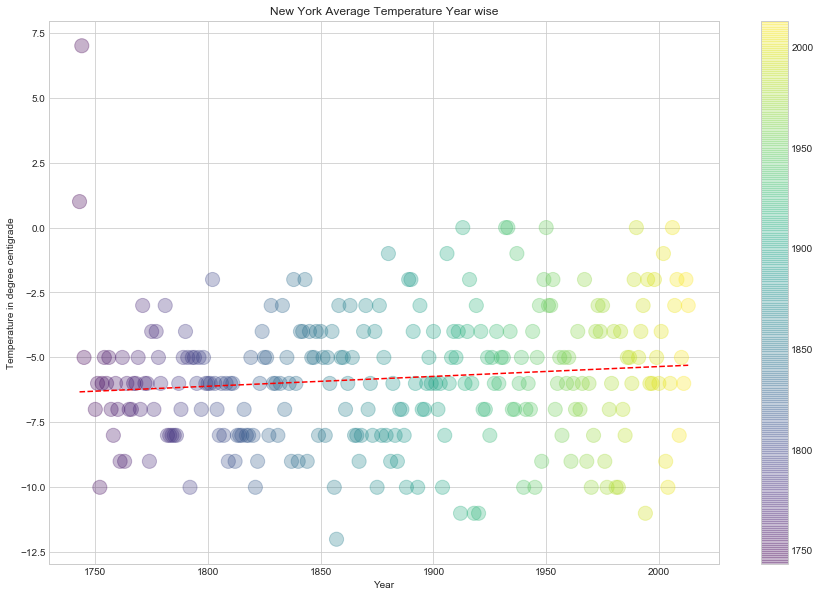

In [170]:
query1 = """SELECT strftime('%Y',DATE)Year, AVG_TEMP, STATE
            FROM STATE
            WHERE AVG_TEMP != '' and STATE== 'New York'
            GROUP BY Year"""
df = pd.read_sql(query1, con = conn)


df.head(5)
plt.figure(figsize=(15,10))
plt.style.use('seaborn-whitegrid')
# rng = np.random.RandomState(0)
x =[int(i) for i in df['Year']] 
y = [int(i) for i in df['AVG_TEMP']]
colors = [int(i) for i in df['Year']]
sizes = 1000*rng.rand(51)

plt.scatter(x, y, c=colors, s=200, alpha=0.3,
            cmap='viridis')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.colorbar();
plt.title("New York Average Temperature Year wise")
plt.xlabel("Year")
plt.ylabel("Temperature in degree centigrade")


Scatter plot of New York city temperature for every year and a trend line showing increase of temperature over the years

In [172]:
# px.data.tips()

In [151]:
# query="""SELECT strftime('%Y',DATE)Year, AVG(LAND_AVG_TEMP) LandAverageTemperature
#             FROM GLOBAL_TEMP
#             WHERE LAND_AVG_TEMP != '' and COUNTRY='India'
#             GROUP BY Year"""

# df = pd.read_sql(query2, con = conn)
# df1.head(5)
# py.iplot filemames
# list1=['Denmark','France','Denmark (Europe)','France (Europe)']
# list2=['Greenland','Morroco','Denmark','France']
# for i in range(len(list1)):
#     query="UPDATE COUNTRY SET COUNTRY = '"+ list2[i]+"' WHERE COUNTRY= '"+list1[i]+"'"
#     c.execute(query) 
# c.execute("select count(*) from COUNTRY where COUNTRY='Denmark (Europe)'")
# rows = c.fetchall()
# print(rows)
# query="UPDATE COUNTRY SET COUNTRY = '"+ list2[1]+"' WHERE COUNTRY= '"+list1[1]+"'"
# query
# 'Netherlands (Europe)','United Kingdom (Europe)'
# 'Netherlands','Europe'


In [152]:
import mpl_toolkits
mpl_toolkits.__path__.append('/usr/lib/python2.7/dist-packages/mpl_toolkits/')
from mpl_toolkits.basemap import Basemap

In [23]:
conn.close()